In [2]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np

In [3]:
permcrop_df = pd.read_csv('../CSVs/Permanent_Crop_NUTS2_2019.csv', sep=",")

In [8]:
permcrop_df.head(55)

,NutsID,Region Name,NUTS ID,pc.year,pc.area,pcn.crop_name
0,11,Norte,2,2019,255954,Total
1,11,Norte,2,2019,13815,Fresh fruit plantations (excluding citrus plan...
2,11,Norte,2,2019,1257,Citrus plantations
3,11,Norte,2,2019,2619,Fruit plantations (subtropical climate zones)
4,11,Norte,2,2019,73849,Nuts plantations
5,11,Norte,2,2019,82777,Olive plantations
6,11,Norte,2,2019,81411,Vineyards
7,11,Norte,2,2019,226,Other permanent crops
8,15,Algarve,2,2019,56754,Total
9,15,Algarve,2,2019,3744,Fresh fruit plantations (excluding citrus plan...


## See the total area per region of permanent crops

In [10]:
# Obtain only total to obtain the permantent area of crops for 2019.
permcrop_df_filter = permcrop_df[permcrop_df['pcn.crop_name'] == 'Total']
permcrop_df_filter.head()

,NutsID,Region Name,NUTS ID,pc.year,pc.area,pcn.crop_name
0,11,Norte,2,2019,255954,Total
8,15,Algarve,2,2019,56754,Total
16,16,Centro,2,2019,168086,Total
24,17,Área Metropolitana de Lisboa,2,2019,16428,Total
32,18,Alentejo,2,2019,358544,Total


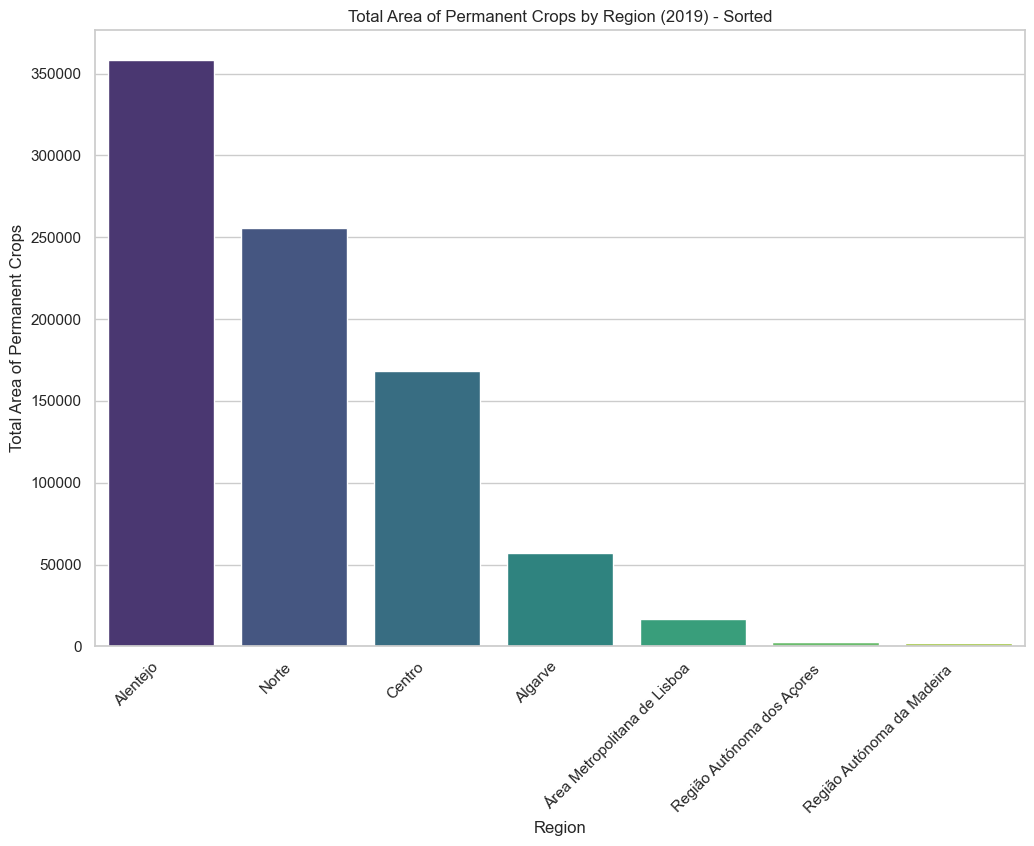

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'pc.area' in descending order
permcrop_df_filter_sorted = permcrop_df_filter.sort_values(by='pc.area', ascending=False)

# Set style
sns.set(style="whitegrid")

# Bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Region Name', y='pc.area', data=permcrop_df_filter_sorted, palette="viridis")

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Region')
plt.ylabel('Total Area of Permanent Crops')
plt.title('Total Area of Permanent Crops by Region (2019) - Sorted')

# Show plot
plt.show()


## See the area per crop per region

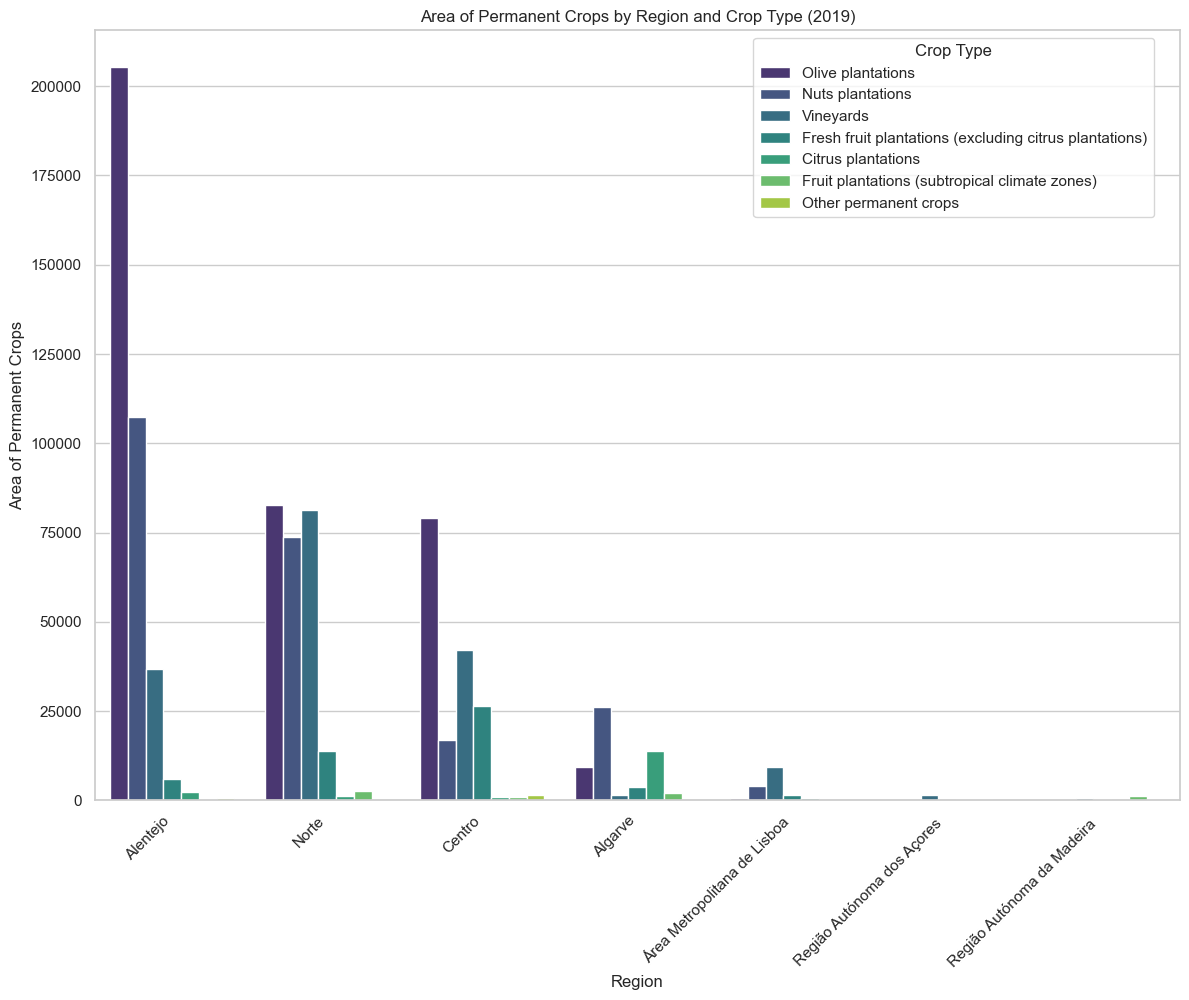

In [23]:
# the dataframe with all the data is permcrop_df

# Filter out 'Total'
permcrop_df_filter = permcrop_df[permcrop_df['pcn.crop_name'] != 'Total']

permcrop_df_filter = permcrop_df_filter.sort_values(by='pc.area', ascending=False)

# Set style
sns.set(style="whitegrid")

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='Region Name', y='pc.area', hue='pcn.crop_name', data=permcrop_df_filter, palette="viridis")

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Region')
plt.ylabel('Area of Permanent Crops')
plt.title('Area of Permanent Crops by Region and Crop Type (2019)')
plt.legend(title='Crop Type', bbox_to_anchor=(0.6, 1), loc='upper left')

# Show plot
plt.show()